<a href="https://colab.research.google.com/github/gachet/mis-colabs/blob/master/soluciones_minimos_cuad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios Mínimos Cuadrados

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
%cd /content/gdrive/My Drive/Colab Notebooks/

/content/gdrive/My Drive/Colab Notebooks


### 1- La tabla siguiente muestra el número de transistores en un procesador Intel desde 1970, encuentre los coeficientes del modelo $y=c_{1}*e^{c_{2}*t}$ correspondiente a estos datos. Considerar el año 1970 como el año 0.

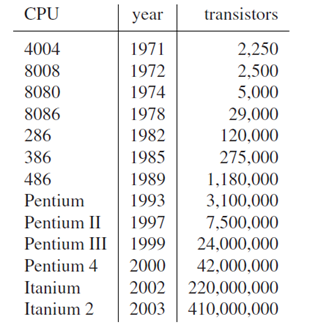

In [0]:
from IPython.display import Image
Image(filename="tablas/uno.png")

### ecuacion lineal $ v= \alpha x+ \beta  \,\,\,Siendo \,\,\,\, v= \ln y \,\,\,\,\beta = \ln c1 \,\,\,\, a=c2$

In [0]:
x_orig = np.array([1,2,4,8,12,15,19,23,27,29,30,32,33])
y_orig = np.array([2250,2500,5000,29000,120000,275000,\
                   1180000,3100000,7500000,24000000,42000000,220000000,410000000])
x = x_orig.reshape(-1,1)
y = y_orig.reshape(-1,1)
unos = np.ones(len(x))
unos = unos.reshape(-1,1)
for i in range(0,len(x)):
    print('%4.f\t\t\t'%(x[i]),'%4.3f'%(y[i]))

   1			 2250.000
   2			 2500.000
   4			 5000.000
   8			 29000.000
  12			 120000.000
  15			 275000.000
  19			 1180000.000
  23			 3100000.000
  27			 7500000.000
  29			 24000000.000
  30			 42000000.000
  32			 220000000.000
  33			 410000000.000


In [0]:
A = A = np.column_stack((x,np.ones(len(x))))
print('Matriz A \n',A)

Matriz A 
 [[ 1.  1.]
 [ 2.  1.]
 [ 4.  1.]
 [ 8.  1.]
 [12.  1.]
 [15.  1.]
 [19.  1.]
 [23.  1.]
 [27.  1.]
 [29.  1.]
 [30.  1.]
 [32.  1.]
 [33.  1.]]


In [0]:
v = np.log(y)
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,v))
alfa = c[0]
beta = c[1]
print('Coeficientes  \u03B1 y \u03B2 \n',alfa,beta)
c1 = np.e**beta
c2 = alfa
print('Coeficientes  c1 y c2 son  \n',c1,c2)

Coeficientes  α y β 
 [0.35463996] [7.19694301]
Coeficientes  c1 y c2 son  
 [1335.34238408] [0.35463996]


In [0]:
y_calc = c1*np.e **(c2*x)
print('vector y_calc es\n',y_calc)

vector y_calc es
 [[1.90375393e+03]
 [2.71411968e+03]
 [5.51652198e+03]
 [2.27896719e+04]
 [9.41479335e+04]
 [2.72813170e+05]
 [1.12703668e+06]
 [4.65597640e+06]
 [1.92346146e+07]
 [3.90948768e+07]
 [5.57362864e+07]
 [1.13285516e+08]
 [1.61507453e+08]]


In [0]:
suma_cuad_err= np.sum((y-y_calc)**2)
suma_cuad_err         

7.369319347627419e+16

In [0]:

v=np.log(y)
v_calc= alfa*x+beta
R2 = np.sum((v_calc-np.mean(v))**2)/np.sum((v-np.mean(v))**2)
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.986717447893589


## Ecuación es &nbsp;&nbsp;&nbsp;&nbsp;   $transistores = 1335.3*e^{0.3546*año} $ 

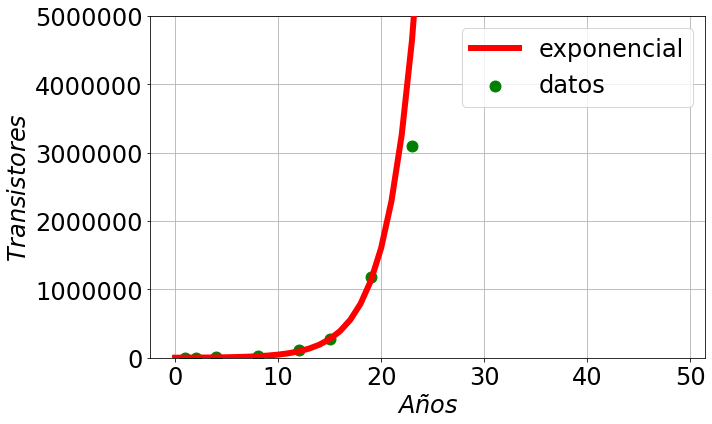

In [0]:
plt.figure(figsize = (10,6) )
plt.grid(True)

# plot data as scatter plot,
bottom, top = 0.,5000000  # return the current ylim
plt.ylim((bottom, top))   # set the ylim to bottom, top
plt.scatter(x,y,s=120,c='green',label='datos',zorder=2)
# plot best fit
x_nuevo = np.arange(0,50)
y_calc = c1*np.e **(c2*x_nuevo)
plt.plot(x_nuevo,y_calc,c='red',linewidth=6,label='exponencial',zorder=4)
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('$Transistores$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.tight_layout()
plt.show()



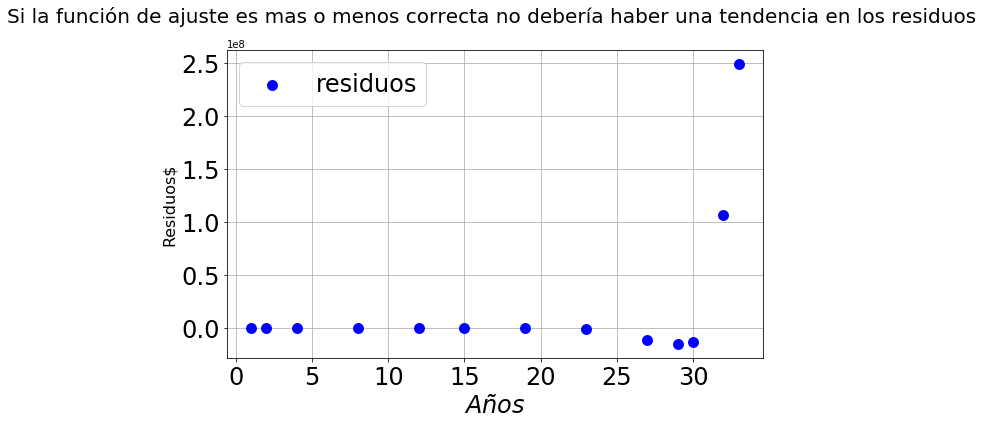

In [0]:
## plot errors to look for trend
######### Now generate plot
plt.figure(figsize = (12,6) )
plt.grid(True)
#bottom, top = -0.2,0.2  # return the current ylim
#plt.ylim((bottom, top))   # set the ylim to bottom, top
# plot data as scatter plot,
plt.title('Si la función de ajuste es mas o menos correcta no debería haber una tendencia en los residuos \n',fontsize=20)
# these are the error or residuals in y values
y_calc = c1*np.e **(c2*x)
plt.scatter(x,(y-y_calc),s=120,c='blue',linewidth=0,label='residuos',zorder=2)
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('Residuos$',fontsize=16)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left',fontsize=24)
plt.tight_layout()
plt.show()

### 2.- La concentración $y$ de una droga en la sangre se describe de acuerdo al modelo $y=c_{1}*t*e^{c_{2}*t}$. Linealizar la ecuación y calcular $c_{1}$ y $c_{2}$ mediante mínimos cuadrados dados los datos siguientes:

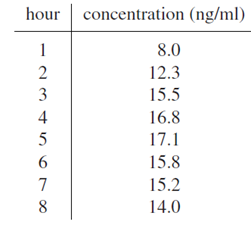

In [0]:
from IPython.display import Image
Image(filename="tablas/dos.png")

### Ecuación lineal $ v= \alpha x+ \beta  \,\,\,Siendo \,\,\,\, v= \ln (y/x) \,\,\,\,\beta = \ln c1 \,\,\,\, a=c2$

In [0]:
x_orig = np.array([1,2,3,4,5,6,7,8])
y_orig = np.array([8,12.3,15.5,16.8,17.1,15.8,15.2,14])
x = x_orig.reshape(-1,1)
y = y_orig.reshape(-1,1)
unos = np.ones(len(x))
unos = unos.reshape(-1,1)
for i in range(0,len(x)):
    print('%4.f\t\t\t'%(x[i]),'%4.3f'%(y[i]))

   1			 8.000
   2			 12.300
   3			 15.500
   4			 16.800
   5			 17.100
   6			 15.800
   7			 15.200
   8			 14.000


In [0]:
A = A = np.column_stack((x,np.ones(len(x))))
print('Matriz A \n',A)

Matriz A 
 [[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]
 [6. 1.]
 [7. 1.]
 [8. 1.]]


In [0]:
v = np.log(y/x)
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,v))
alfa = c[0]
beta = c[1]
print('Coeficientes  \u03B1 y \u03B2 \n',alfa,beta)
c1 = np.e**beta
c2 = alfa
print('Coeficientes  c1 y c2 son  \n',c1,c2)

Coeficientes  α y β 
 [-0.21513679] [2.28137779]
Coeficientes  c1 y c2 son  
 [9.79015986] [-0.21513679]


In [0]:
y_calc = c1*x*np.e **(c2*x)
print('vector y_calc es\n',y_calc)

vector y_calc es
 [[ 7.89508962]
 [12.73369199]
 [15.40326831]
 [16.5622333 ]
 [16.69537552]
 [16.15640453]
 [15.20053204]
 [14.00935101]]


In [0]:
suma_cuad_err= np.sum((y-y_calc)**2)
suma_cuad_err         

0.5558178376791465

In [0]:

v=np.log(y/x)
v_calc= alfa*x+beta
R2 = np.sum((v_calc-np.mean(v))**2)/np.sum((v-np.mean(v))**2)
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.9986186936173856


## Ecuación es &nbsp;&nbsp;&nbsp;$concentración = 9.79*hora*e^{-0.21*hora} $ 

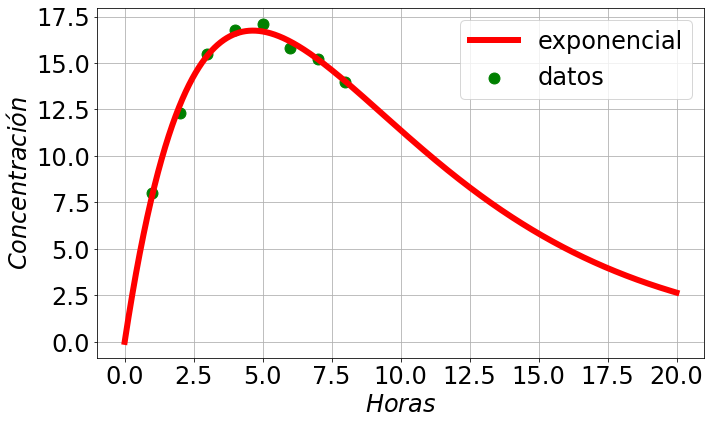

In [0]:
plt.figure(figsize = (10,6) )
plt.grid(True)

# plot data as scatter plot,
#bottom, top = 0.,5000000  # return the current ylim
#plt.ylim((bottom, top))   # set the ylim to bottom, top
plt.scatter(x,y,s=120,c='green',label='datos',zorder=2)
# plot best fit
x_nuevo = np.arange(0,20,0.001)
y_calc_nuevo = c1*x_nuevo*np.e **(c2*x_nuevo)
plt.plot(x_nuevo,y_calc_nuevo,c='red',linewidth=6,label='exponencial',zorder=4)
#plt.plot(x,y_calc,c='red',linewidth=6,label='exponencial',zorder=4)
plt.xlabel('$Horas$',fontsize=24)
plt.ylabel('$Concentración$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.tight_layout()
plt.show()



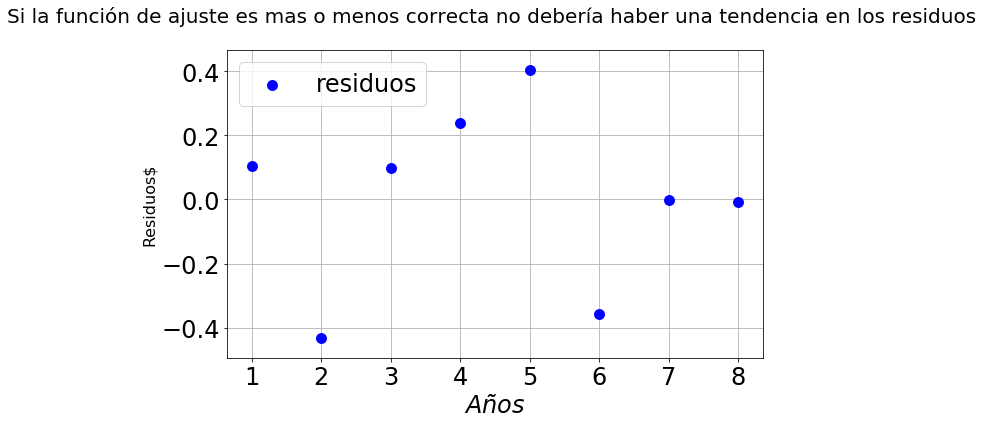

In [0]:
## plot errors to look for trend
######### Now generate plot
plt.figure(figsize = (12,6) )
plt.grid(True)
#bottom, top = -0.2,0.2  # return the current ylim
#plt.ylim((bottom, top))   # set the ylim to bottom, top
# plot data as scatter plot,
plt.title('Si la función de ajuste es mas o menos correcta no debería haber una tendencia en los residuos \n',fontsize=20)
# these are the error or residuals in y values
y_calc = c1*x*np.e **(c2*x)
plt.scatter(x,(y-y_calc),s=120,c='blue',linewidth=0,label='residuos',zorder=2)
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('Residuos$',fontsize=16)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left',fontsize=24)
plt.tight_layout()
plt.show()

### 3.- La siguiente tabla muestra la concentración anual de $CO_2$ atmosférico (en partes por millón) en la Antártida. Ajuste una  recta a los datos y determine el aumento promedio de la concentración por año.

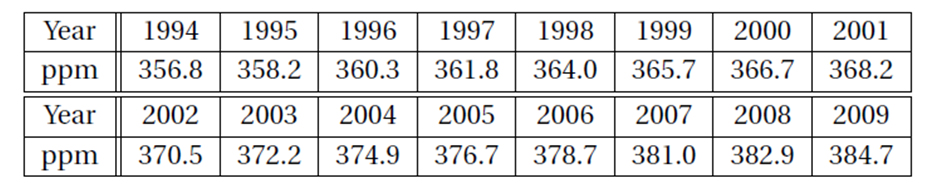

In [0]:
from IPython.display import Image
Image(filename="tablas/tres.png")

In [0]:
ppm_orig = np.array([356.8,358.2,360.3,361.8, 364.0,365.7,\
366.7,368.2,370.5,372.2,374.9,376.7,\
378.7,381.0,382.9,384.7])
year_orig = np.arange(1994,2010,1)
ppm = ppm_orig.reshape(-1,1)
year = year_orig.reshape(-1,1)
unos = np.ones(len(ppm))
unos = unos.reshape(-1,1)
for i in range(0,len(ppm)):
    print('%4.f\t\t\t'%(year[i]),'%4.3f'%(ppm[i]))



1994			 356.800
1995			 358.200
1996			 360.300
1997			 361.800
1998			 364.000
1999			 365.700
2000			 366.700
2001			 368.200
2002			 370.500
2003			 372.200
2004			 374.900
2005			 376.700
2006			 378.700
2007			 381.000
2008			 382.900
2009			 384.700


In [0]:
A = A = np.column_stack((year,np.ones(len(year))))
print('Matriz A \n',A)

Matriz A 
 [[1.994e+03 1.000e+00]
 [1.995e+03 1.000e+00]
 [1.996e+03 1.000e+00]
 [1.997e+03 1.000e+00]
 [1.998e+03 1.000e+00]
 [1.999e+03 1.000e+00]
 [2.000e+03 1.000e+00]
 [2.001e+03 1.000e+00]
 [2.002e+03 1.000e+00]
 [2.003e+03 1.000e+00]
 [2.004e+03 1.000e+00]
 [2.005e+03 1.000e+00]
 [2.006e+03 1.000e+00]
 [2.007e+03 1.000e+00]
 [2.008e+03 1.000e+00]
 [2.009e+03 1.000e+00]]


In [0]:
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,ppm))
alfa = c[0]
beta = c[1]
print('Coeficientes  \u03B1 y \u03B2 \n',alfa,beta)


Coeficientes  α y β 
 [1.87220588] [-3377.0138236]


In [0]:


c = np.polyfit(year_orig,ppm_orig,1)
print('Increase in ppm/year = ',c[0])



Increase in ppm/year =  1.8722058823529986


In [0]:
ppm_calc = alfa*year + beta
print('vector y_calc es\n',y_calc)

vector y_calc es
 [[11.42184678]
 [ 8.40611684]
 [ 3.65211318]
 [ 6.66200998]
 [ 5.95036771]
 [ 9.70690558]
 [ 8.77360424]
 [11.59684078]
 [ 9.70690558]
 [ 9.06526091]
 [11.45684558]
 [ 6.48118284]]


In [0]:
suma_cuad_err= np.sum((ppm-ppm_calc)**2)
suma_cuad_err         

4.176720588235335

In [0]:

R2 = np.sum((ppm_calc-np.mean(ppm))**2)/np.sum((ppm-np.mean(ppm))**2)
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.9965075525061832


$ppm = 1,87*year - 3377$

In [0]:
ahumento = np.zeros(len(ppm)-1)
for i in range(0,len(ppm)-1):
    ahumento[i] = ppm_calc[i+1]-ppm_calc[i]
ahumento_promedio = np.mean(ahumento)
print(ahumento)

print(ahumento_promedio)


[1.87220588 1.87220588 1.87220588 1.87220588 1.87220588 1.87220588
 1.87220588 1.87220588 1.87220588 1.87220588 1.87220588 1.87220588
 1.87220588 1.87220588 1.87220588]
1.8722058823841508


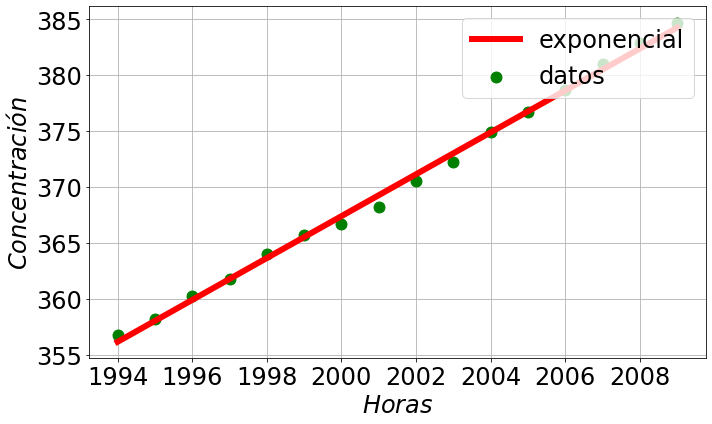

In [0]:
plt.figure(figsize = (10,6) )
plt.grid(True)

# plot data as scatter plot,
#bottom, top = 0.,5000000  # return the current ylim
#plt.ylim((bottom, top))   # set the ylim to bottom, top
plt.scatter(year,ppm,s=120,c='green',label='datos',zorder=2)
# plot best fit
x_nuevo = np.arange(1994,2010,1)
y_calc = alfa*x_nuevo+beta
plt.plot(x_nuevo,y_calc,c='red',linewidth=6,label='exponencial',zorder=4)
#plt.plot(x,y_calc,c='red',linewidth=6,label='exponencial',zorder=4)
plt.xlabel('$Horas$',fontsize=24)
plt.ylabel('$Concentración$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.tight_layout()
plt.show()



In [0]:
Solución C1 = 1.87220588236 (Kiusalaas  5)

### 4.- La siguiente tabla muestra la masa M y el consumo promedio de combustible φ de vehículos automotores fabricados por Ford y Honda en 2008. Ajustar una  recta φ = a + bM a los datos y calcular el coeficiente de determinación.


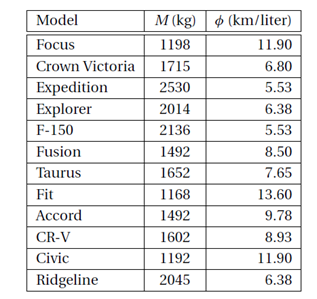

In [0]:
from IPython.display import Image
Image(filename="tablas/cuatro.png")

In [0]:
x_orig = np.array([1198, 1715, 2530, 2014, 2136, 1492, 1652, \
1168, 1492, 1602, 1192, 2045])*1.0
y_orig= np.array([11.9, 6.8, 5.53, 6.38, 5.53, 8.50, 7.65, \
13.60, 9.78, 8.93, 11.90, 6.38])
x = x_orig.reshape(-1,1)
y = y_orig.reshape(-1,1)
unos = np.ones(len(x))
unos = unos.reshape(-1,1)
for i in range(0,len(x)):
    print('%4.f\t\t\t'%(x[i]),'%4.3f'%(y[i]))

1198			 11.900
1715			 6.800
2530			 5.530
2014			 6.380
2136			 5.530
1492			 8.500
1652			 7.650
1168			 13.600
1492			 9.780
1602			 8.930
1192			 11.900
2045			 6.380


In [0]:
A = A = np.column_stack((x,np.ones(len(x))))
print('Matriz A \n',A)

Matriz A 
 [[1.198e+03 1.000e+00]
 [1.715e+03 1.000e+00]
 [2.530e+03 1.000e+00]
 [2.014e+03 1.000e+00]
 [2.136e+03 1.000e+00]
 [1.492e+03 1.000e+00]
 [1.652e+03 1.000e+00]
 [1.168e+03 1.000e+00]
 [1.492e+03 1.000e+00]
 [1.602e+03 1.000e+00]
 [1.192e+03 1.000e+00]
 [2.045e+03 1.000e+00]]


In [0]:
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,y))
alfa = c[0]
beta = c[1]
print('Coeficientes  \u03B1 y \u03B2 \n',alfa,beta)


Coeficientes  α y β 
 [-0.00583313] [18.40994051]


In [0]:


c1 = np.polyfit(x_orig,y_orig,1)
c1



array([-5.83313334e-03,  1.84099405e+01])

In [0]:
y_calc = alfa*x + beta
print('vector y_calc es\n',y_calc)

vector y_calc es
 [[11.42184678]
 [ 8.40611684]
 [ 3.65211318]
 [ 6.66200998]
 [ 5.95036771]
 [ 9.70690558]
 [ 8.77360424]
 [11.59684078]
 [ 9.70690558]
 [ 9.06526091]
 [11.45684558]
 [ 6.48118284]]


In [0]:
suma_cuad_err= np.sum((y-y_calc)**2)
suma_cuad_err         

13.552955939074776

In [0]:

R2 = np.sum((y_calc-np.mean(y))**2)/np.sum((y-np.mean(y))**2)
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.8329515085021147


$y =  -0,00583313334 x +18$

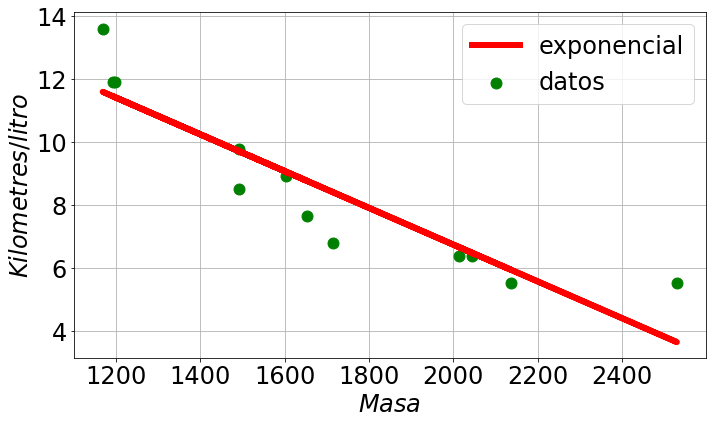

In [0]:
plt.figure(figsize = (10,6) )
plt.grid(True)

# plot data as scatter plot,
#bottom, top = 0.,5000000  # return the current ylim
#plt.ylim((bottom, top))   # set the ylim to bottom, top
plt.scatter(x,y,s=120,c='green',label='datos',zorder=2)
# plot best fit
#x_nuevo = np.arange(1994,2010,1)
#y_calc = alfa*x_nuevo+beta
#plt.plot(x_nuevo,y_calc,c='red',linewidth=6,label='exponencial',zorder=4)
plt.plot(x,y_calc,c='red',linewidth=6,label='exponencial',zorder=4)
plt.xlabel('$Masa$',fontsize=24)
plt.ylabel('$Kilometres/litro$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.tight_layout()
plt.show()



In [0]:
Coefficients are:  (Kiusalaas 6)
[ 1.84099405e+01 -5.83313334e-03]
Std. deviation = 1.1641716342135628


### 5.- La densidad relativa $\rho$ del aire se midió a varias altitudes $h$. Los resultados se muestran en la tabla siguiente. Realice un ajuste con un polinomio de segundo grado por mínimos cuadrados y determina la densidad   $\rho$ a una altura de 10.5 km

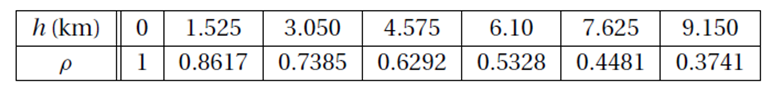

In [0]:
from IPython.display import Image
Image(filename="tablas/cinco.png")

In [0]:
x_orig = np.array([0.0, 1.525, 3.050, 4.575, 6.1,7.625, 9.15])
y_orig = np.array([1.0, 0.8617, 0.7385, 0.6292, 0.5328,0.4481, 0.3741])
x = x_orig.reshape(-1,1)
y = y_orig.reshape(-1,1)
unos = np.ones(len(x))
unos = unos.reshape(-1,1)
for i in range(0,len(x)):
    print('%4.3f\t\t\t'%(x[i]),'%4.3f'%(y[i]))

0.000			 1.000
1.525			 0.862
3.050			 0.739
4.575			 0.629
6.100			 0.533
7.625			 0.448
9.150			 0.374


In [0]:
A = A = np.column_stack((x**2,x,np.ones(len(x))))
print('Matriz A \n',A)

Matriz A 
 [[ 0.        0.        1.      ]
 [ 2.325625  1.525     1.      ]
 [ 9.3025    3.05      1.      ]
 [20.930625  4.575     1.      ]
 [37.21      6.1       1.      ]
 [58.140625  7.625     1.      ]
 [83.7225    9.15      1.      ]]


In [0]:
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,y))
c1= c[0]
c2 = c[1]
c3 = c[2]
print('Coeficientes ',c)


Coeficientes  [[ 0.00276321]
 [-0.09344731]
 [ 0.99889524]]


In [0]:
sol = np.polyfit(x_orig,y_orig,2)
sol



array([ 0.00276321, -0.09344731,  0.99889524])

In [0]:
y_calc = c1*x**2 + c2*x+c3
print('vector y_calc es\n',y_calc)

vector y_calc es
 [[0.99889524]
 [0.86281429]
 [0.73958571]
 [0.62920952]
 [0.53168571]
 [0.44701429]
 [0.37519524]]


In [0]:
suma_cuad_err= np.sum((y-y_calc)**2)
suma_cuad_err         

7.260952380952617e-06

In [0]:

R2 = np.sum((y_calc-np.mean(y))**2)/np.sum((y-np.mean(y))**2)
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.9999762739552345


$y =  0.00276321x^2 -0.09344731x + 0.99889524$

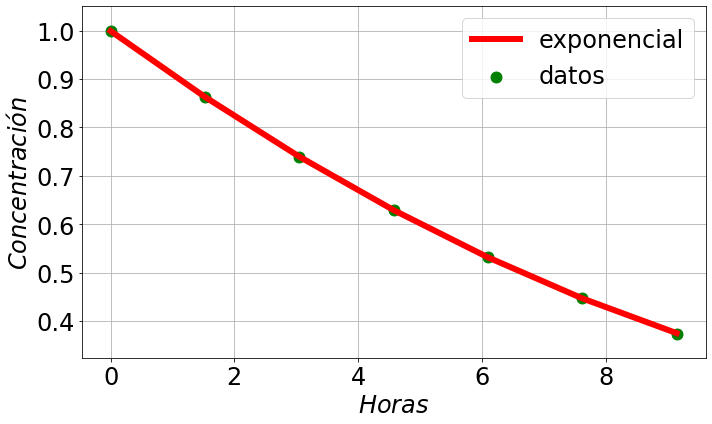

In [0]:
plt.figure(figsize = (10,6) )
plt.grid(True)

# plot data as scatter plot,
#bottom, top = 0.,5000000  # return the current ylim
#plt.ylim((bottom, top))   # set the ylim to bottom, top
plt.scatter(x,y,s=120,c='green',label='datos',zorder=2)
# plot best fit
x_nuevo = np.arange(0,10,100)
y_calc_nuevo =  c1*x_nuevo**2 + c2*x_nuevo+c3
#plt.plot(x_nuevo,y_calc_nuevo,c='red',linewidth=6,label='exponencial',zorder=4)
plt.plot(x,y_calc,c='red',linewidth=6,label='exponencial',zorder=4)
plt.xlabel('$Horas$',fontsize=24)
plt.ylabel('$Concentración$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.tight_layout()
plt.show()



densidad a 10.5

In [0]:
dens =  0.00276321*(10.5)**2 -0.09344731*(10.5) + 0.99889524
dens

0.3223423875

In [0]:
p = np.poly1d(sol)
p(10.5)

0.3223424297103954

In [0]:
Coefficients are:  (Kiusalaas 7)
[ 0.99889524 -0.09344731 0.00276321]
Std. deviation = 0.0013473077210637862
Rel. density at h = 10.5 km = 0.32234242971

### 6.- La intensidad de la radiación de una sustancia radiactiva se midió en intervalos de medio año como se indica en la tabla siguiente.


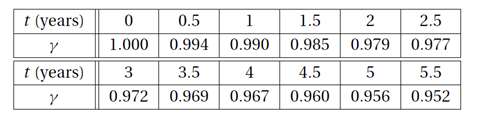

In [0]:
from IPython.display import Image
Image(filename="tablas/seis.png")

#### Siendo $\gamma$ la intensidad de radiación relativa. Se conoce que la radiación decae exponencialmente con el tiempo de acuerdo con la ecuación $\gamma(t) = a*e^{-b*t}$. Estimar la vida media de la sustancia ($\gamma = 0.5$).

In [0]:
x_orig = np.arange(0.0,5.51,0.5)
y_orig=  np.array([1.000, 0.994, 0.990, 0.985, 0.979, 0.977,0.972, 0.969, 0.967, 0.960, 0.956, 0.952])
x = x_orig.reshape(-1,1)
y = y_orig.reshape(-1,1)
unos = np.ones(len(x))
unos = unos.reshape(-1,1)
for i in range(0,len(x)):
    print('%4.3f\t\t\t'%(x[i]),'%4.3f'%(y[i]))

0.000			 1.000
0.500			 0.994
1.000			 0.990
1.500			 0.985
2.000			 0.979
2.500			 0.977
3.000			 0.972
3.500			 0.969
4.000			 0.967
4.500			 0.960
5.000			 0.956
5.500			 0.952


In [0]:
A = A = np.column_stack((x,np.ones(len(x))))
print('Matriz A \n',A)

Matriz A 
 [[0.  1. ]
 [0.5 1. ]
 [1.  1. ]
 [1.5 1. ]
 [2.  1. ]
 [2.5 1. ]
 [3.  1. ]
 [3.5 1. ]
 [4.  1. ]
 [4.5 1. ]
 [5.  1. ]
 [5.5 1. ]]


In [0]:
v = np.log(y)
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,v))
alfa = c[0]
beta = c[1]
print('Coeficientes  \u03B1 y \u03B2 \n',alfa,beta)
c1 = np.e**beta
c2 = alfa
print('Coeficientes  c1 y c2 son  \n',c1,c2)

Coeficientes  α y β 
 [-0.00863955] [-0.00158547]
Coeficientes  c1 y c2 son  
 [0.99841578] [-0.00863955]


In [0]:
y_calc = c1*np.e **(c2*x)
print('vector y_calc es\n',y_calc)

vector y_calc es
 [[0.99841578]
 [0.99411215]
 [0.98982707]
 [0.98556047]
 [0.98131225]
 [0.97708234]
 [0.97287067]
 [0.96867715]
 [0.96450171]
 [0.96034427]
 [0.95620474]
 [0.95208306]]


In [0]:
suma_cuad_err= np.sum((y-y_calc)**2)
suma_cuad_err         

1.5490711846522136e-05

In [0]:

v=np.log(y)
v_calc= alfa*x+beta
R2 = np.sum((v_calc-np.mean(v))**2)/np.sum((v-np.mean(v))**2)
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.9939510396367889


$y = 0.99841578*e^{-0.00863955*t} $  

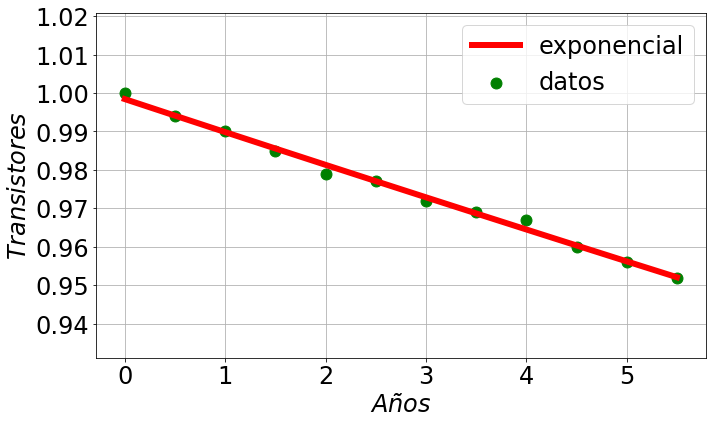

In [0]:
plt.figure(figsize = (10,6) )
plt.grid(True)

# plot data as scatter plot,
#bottom, top = 0.,5000000  # return the current ylim
#plt.ylim((bottom, top))   # set the ylim to bottom, top
plt.scatter(x,y,s=120,c='green',label='datos',zorder=2)
# plot best fit
#x_nuevo = np.arange(0,50)
#y_calc = c1*np.e **(c2*x_nuevo)
plt.plot(x,y_calc,c='red',linewidth=6,label='exponencial',zorder=4)
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('$Transistores$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.tight_layout()
plt.show()



In [0]:
ecuacion v= ax+b v= lny b= lnc1 a=c2

In [0]:
xmedia = (np.log(0.5)- np.log(c1))/c2
print('x_media es  es\n',xmedia)

x_media es  es
 [80.04603591]


In [0]:
half_life = 79.9962166337 years kiusalaas

### 7.- Se ha monitorizado la concentración de la bacteria $E coli$ en una piscina después de una tormenta y se han obtenido los siguientes datos.



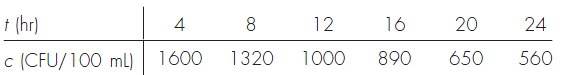

In [0]:
from IPython.display import Image
Image(filename="tablas/siete.png")

#### El tiempo se ha medido en horas transcurridas después de la tormenta y la unidad CFU es una "unidad de formación de colonia". Utilizar los datos para estimar:
#### 1. La concentración cuando finalizó la tormenta (t=0)
#### 2. El tiempo en el que la concentración alcanza las 200 CFU/100 ml. <br>
#### *** El modelo debería ser consistente con el echo de que no pueden haber concentraciones negativas así como que la concentración decae en el tiempo.

In [0]:
x_orig = np.array([4,8,12,16,20,24])
y_orig=  np.array([1600, 1320, 1000, 890, 650,560])
x = x_orig.reshape(-1,1)
y = y_orig.reshape(-1,1)
unos = np.ones(len(x))
unos = unos.reshape(-1,1)
for i in range(0,len(x)):
    print('%4.3f\t\t\t'%(x[i]),'%4.3f'%(y[i]))

4.000			 1600.000
8.000			 1320.000
12.000			 1000.000
16.000			 890.000
20.000			 650.000
24.000			 560.000


Utilizaremos el modelo $y=c_{1}*e^{c_{2}*t}$

In [0]:
A = A = np.column_stack((x,np.ones(len(x))))
print('Matriz A \n',A)

Matriz A 
 [[ 4.  1.]
 [ 8.  1.]
 [12.  1.]
 [16.  1.]
 [20.  1.]
 [24.  1.]]


In [0]:
v = np.log(y)
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,v))
alfa = c[0]
beta = c[1]
print('Coeficientes  \u03B1 y \u03B2 \n',alfa,beta)
c1 = np.e**beta
c2 = alfa
print('Coeficientes  c1 y c2 son  \n',c1,c2)

Coeficientes  α y β 
 [-0.05350635] [7.59359414]
Coeficientes  c1 y c2 son  
 [1985.43664596] [-0.05350635]


In [0]:
y_calc = c1*np.e **(c2*x)
print('vector y_calc es\n',y_calc)

vector y_calc es
 [[1602.89838317]
 [1294.06457365]
 [1044.73442506]
 [ 843.44324166]
 [ 680.93525477]
 [ 549.7380242 ]]


In [0]:
suma_cuad_err= np.sum((y-y_calc)**2)
suma_cuad_err         

5912.045633246062

In [0]:

v=np.log(y)
v_calc= alfa*x+beta
R2 = np.sum((v_calc-np.mean(v))**2)/np.sum((v-np.mean(v))**2)
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.9904823589847215


$y = 1985.3*e^{-0.0546*t} $ 

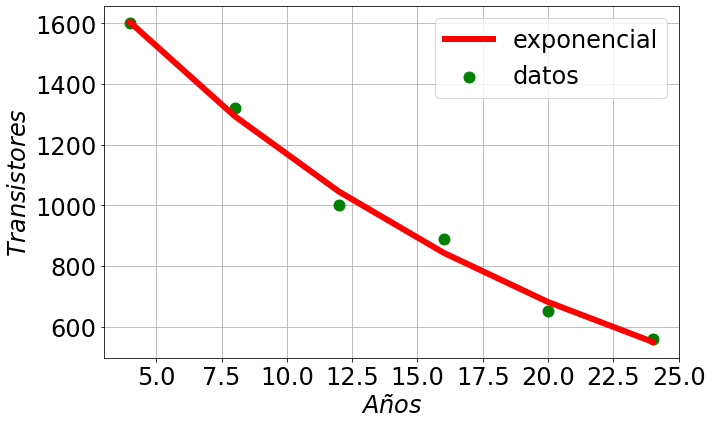

In [0]:
plt.figure(figsize = (10,6) )
plt.grid(True)

# plot data as scatter plot,
#bottom, top = 0.,5000000  # return the current ylim
#plt.ylim((bottom, top))   # set the ylim to bottom, top
plt.scatter(x,y,s=120,c='green',label='datos',zorder=2)
# plot best fit
#x_nuevo = np.arange(0,50)
#y_calc = c1*np.e **(c2*x_nuevo)
plt.plot(x,y_calc,c='red',linewidth=6,label='exponencial',zorder=4)
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('$Transistores$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.tight_layout()
plt.show()



ecuacion v= ax+b v= lny b= lnc1 a=c2

In [0]:
si x=0
bacteria = 1985.43664596

In [0]:
tiempo = (np.log(200)-np.log(c1))/c2
tiempo

array([42.89728154])

In [0]:
a) 1986 bacteria b) 42.897 (Chapra 27)

### 8.- Un investigador informa sobre los datos tabulados a continuación de un experimento para determinar la tasa de crecimiento de bacterias $k$ (por día), como función de la concentración de oxígeno $c$ (mg/L). Se sabe que dichos datos pueden modelarse por medio de la ecuación siguiente $$ k = \frac{k_{max}*c^{2}}{c_{s}+c^{2}}$$ donde $c_s$ y $k_{max}$ son parámetros. Use una transformación para hacer lineal esta ecuación. Después utilice regresión lineal para estimar $c_s$ y $k_{max}$, y pronostique la tasa de crecimiento para $c = 2 mg/L$.

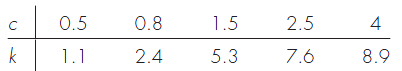

In [0]:
from IPython.display import Image
Image(filename="tablas/ocho.png")

### Linealizamos con $\frac{1}{k}=\frac{c^{2}+c_{s}}{k_{max}c^{2}}=\frac{1}{k_{max}}+\frac{c_{s}}{k_{max}}\frac{1}{c^{2}}$

#### Ecuación Lineal $v =\alpha u + \beta $  con <br><br>$v = \frac{1}{k} \,\,\, \alpha=\frac{c_{s}}{k_{max}}\,\,\, u = \frac{1}{c^{2}} \,\,\, \beta = \frac {1}{k_{max}}\,\,\, $

In [0]:
x_orig = np.array([0.5,0.8,1.5,2.5,4])
y_orig = np.array([1.1,2.4,5.3,7.6,8.9])
x = x_orig.reshape(-1,1)
y = y_orig.reshape(-1,1)
unos = np.ones(len(x))
unos = unos.reshape(-1,1)
for i in range(0,len(x)):
    print('%2.3f\t\t\t'%(x[i]),'%4.3f'%(y[i]))

0.500			 1.100
0.800			 2.400
1.500			 5.300
2.500			 7.600
4.000			 8.900


In [0]:
u = 1./(x**2)
A = A = np.column_stack((u,np.ones(len(x))))
print('Matriz A \n',A)

Matriz A 
 [[4.         1.        ]
 [1.5625     1.        ]
 [0.44444444 1.        ]
 [0.16       1.        ]
 [0.0625     1.        ]]


In [0]:
v = 1./y
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,v))
alfa = c[0]
beta = c[1]
print('Coeficientes  \u03B1 y \u03B2 \n',alfa,beta)
k_max = 1.0/beta
c_s = k_max * alfa
print('Coeficientes  k_max y c_s son  \n',k_max,c_s)

Coeficientes  α y β 
 [0.20248899] [0.09939628]
Coeficientes  k_max y c_s son  
 [10.06073855] [2.03718878]


### ecuación $ k = \frac{10.060738*c^{2}}{2.03718+c^{2}}$

In [0]:
y_calc = (k_max * x**2)/(c_s+x**2)
print('vector y_calc es\n',y_calc)

vector y_calc es
 [[1.09968388]
 [2.40508727]
 [5.28007113]
 [7.5875689 ]
 [8.92444043]]


In [0]:
suma_cuad_err= np.sum((y-y_calc)**2)
suma_cuad_err         

0.0011750066540659136

In [0]:

v=1./y
v_calc= alfa*u+beta
R2 = np.sum((v_calc-np.mean(v))**2)/np.sum((v-np.mean(v))**2)
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.9999966607920286


In [0]:
## Para c = 2 
k_2 = (k_max * 2**2)/(c_s+2**2)
print('para c = 2 k es ', float(k_2))


para c = 2 k es  6.665843263968141


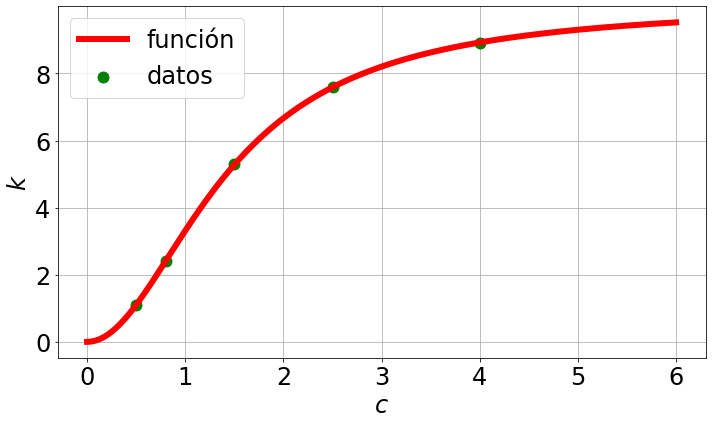

In [0]:
plt.figure(figsize = (10,6) )
plt.grid(True)

# plot data as scatter plot,
##bottom, top = 0.,5000000  # return the current ylim
##plt.ylim((bottom, top))   # set the ylim to bottom, top
plt.scatter(x,y,s=120,c='green',label='datos',zorder=2)
# plot best fit
x_nuevo = np.arange(0,6,0.001)
y_calc_nuevo = (k_max*x_nuevo**2)/(c_s+x_nuevo**2)
plt.plot(x_nuevo,y_calc_nuevo,c='red',linewidth=6,label='función',zorder=4)
plt.xlabel('$c$',fontsize=24)
plt.ylabel('$k$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left',fontsize=24)
plt.tight_layout()
plt.show()



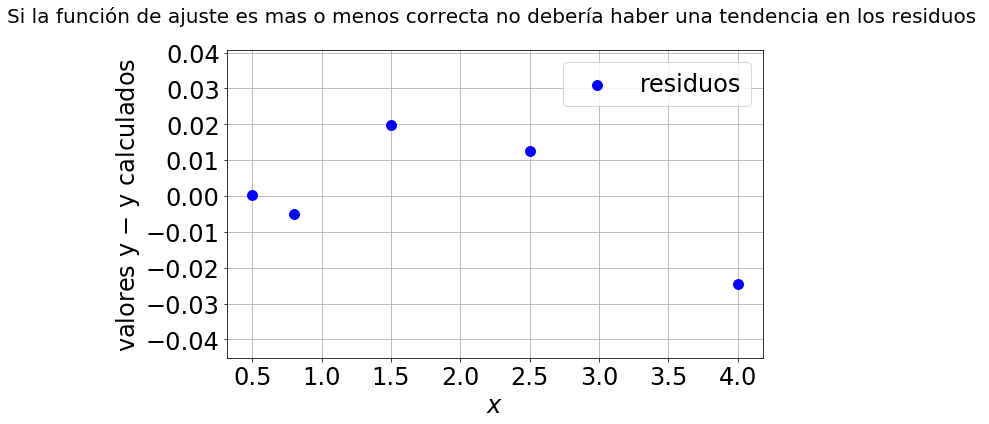

In [0]:
## plot errors to look for trend
######### Now generate plot
plt.figure(figsize = (12,6) )
plt.grid(True)
#bottom, top = -0.00002,0.00002  # return the current ylim
#plt.ylim((bottom, top))   # set the ylim to bottom, top
# plot data as scatter plot,
plt.title('Si la función de ajuste es mas o menos correcta no debería haber una tendencia en los residuos \n',fontsize=20)
# these are the error or residuals in y values
errores = y-y_calc
plt.scatter(x,errores,s=120,c='blue',linewidth=0,label='residuos',zorder=2)
plt.xlabel('$x$',fontsize=24)
plt.ylabel('valores y $-$ y calculados',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.tight_layout()
plt.show()

### 9.- La siguiente tabla muestra la variación de la conductividad térmica del sodio en relación con la temperatura. Encuentre una ecuación cuadrática que relacione ambas variables mediante mínimos cuadrados.

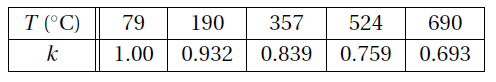

In [0]:
from IPython.display import Image
Image(filename="tablas/nueve.png")

In [0]:
x_orig = np.array([79,190,357,524,690])
y_orig=  np.array([1.000, 0.932, 0.839, 0.759, 0.693])
x = x_orig.reshape(-1,1)
y = y_orig.reshape(-1,1)
unos = np.ones(len(x))
unos = unos.reshape(-1,1)
for i in range(0,len(x)):
    print('%4.3f\t\t\t'%(x[i]),'%4.3f'%(y[i]))

79.000			 1.000
190.000			 0.932
357.000			 0.839
524.000			 0.759
690.000			 0.693


In [0]:
A = A = np.column_stack((x**2,x,np.ones(len(x))))
print('Matriz A \n',A)

Matriz A 
 [[6.24100e+03 7.90000e+01 1.00000e+00]
 [3.61000e+04 1.90000e+02 1.00000e+00]
 [1.27449e+05 3.57000e+02 1.00000e+00]
 [2.74576e+05 5.24000e+02 1.00000e+00]
 [4.76100e+05 6.90000e+02 1.00000e+00]]


In [0]:
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,y))
c1= c[0]
c2 = c[1]
c3 = c[2]
print('Coeficientes ',c)


Coeficientes  [[ 2.30985609e-07]
 [-6.80740001e-04]
 [ 1.05258944e+00]]


In [0]:
sol = np.polyfit(x_orig,y_orig,2)
sol



array([ 2.30985609e-07, -6.80740001e-04,  1.05258944e+00])

In [0]:
y_calc = c1*x**2 + c2*x+c3
print('vector y_calc es\n',y_calc)

vector y_calc es
 [[1.00025256]
 [0.93158742]
 [0.83900414]
 [0.75930478]
 [0.69285109]]


In [0]:
suma_cuad_err= np.sum((y-y_calc)**2)
suma_cuad_err         

3.490944783667925e-07

In [0]:

R2 = np.sum((y_calc-np.mean(y))**2)/np.sum((y-np.mean(y))**2)
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.9999943811526982


$y = 2.30985609e-07x^2 -6.80740001e-04 x +1.05258944$

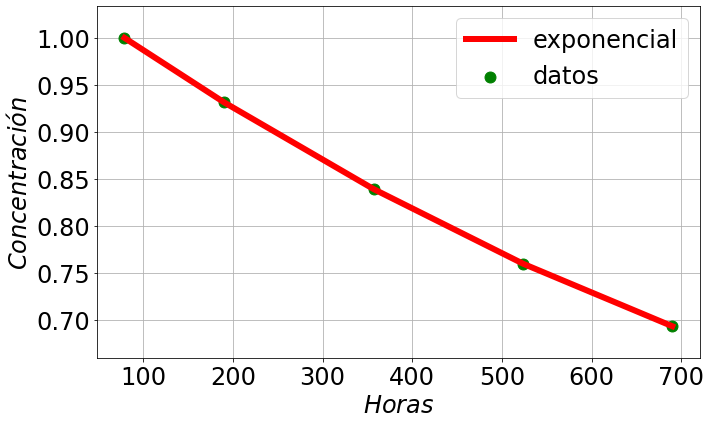

In [0]:
plt.figure(figsize = (10,6) )
plt.grid(True)

# plot data as scatter plot,
#bottom, top = 0.,5000000  # return the current ylim
#plt.ylim((bottom, top))   # set the ylim to bottom, top
plt.scatter(x,y,s=120,c='green',label='datos',zorder=2)
# plot best fit
#x_nuevo = np.arange(1994,2010,1)
#y_calc = alfa*x_nuevo+beta
#plt.plot(x_nuevo,y_calc,c='red',linewidth=6,label='exponencial',zorder=4)
plt.plot(x,y_calc,c='red',linewidth=6,label='exponencial',zorder=4)
plt.xlabel('$Horas$',fontsize=24)
plt.ylabel('$Concentración$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.tight_layout()
plt.show()



### 10.- El precio de un determinado producto varía con los años que está en el mercado, tal y como se muestra en la tabla siguiente:


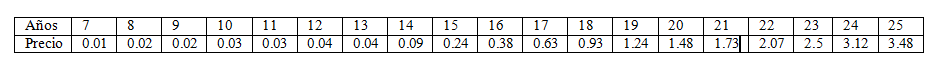

In [0]:
from IPython.display import Image
Image(filename="tablas/diez.png")

#### Ajustar a estos datos los siguientes modelos utilizando mínimos cuadrados y ver cuál es el que mejor se ajusta  (x son loa años y el precio es la y).
1. $y =  c_{1}e^{c_{2}x}$
2. $ y = c_{1}*x^{c_{2}}$
3. $ y= c_{1}x^{2}+c_{2}x+c_{3}$
4. $ y= c_{1}x^{4}+c_{2}x^{3}+c_{3}x{2}+c_{4}x+c_{5}$

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd /content/gdrive/My Drive/Colab Notebooks/tablas
input_data=np.loadtxt('productos.dat',skiprows=2)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/tablas


In [0]:
x_orig=np.array(input_data[:,0])
y_orig=np.array(input_data[:,1])
unos = np.ones(len(x_orig))
x = x_orig.reshape(-1,1)
y = y_orig.reshape(-1,1)
unos = unos.reshape(-1,1)
print('vector X  vector Y')
for i in range(0,len(x)):
    print('%4.3f\t'%(x[i]),'%4.2f'%(y[i]))

vector X  vector Y
7.000	 0.01
8.000	 0.02
9.000	 0.02
10.000	 0.03
11.000	 0.03
12.000	 0.04
13.000	 0.04
14.000	 0.09
15.000	 0.24
16.000	 0.38
17.000	 0.63
18.000	 0.93
19.000	 1.24
20.000	 1.48
21.000	 1.73
22.000	 2.07
23.000	 2.50
24.000	 3.12
25.000	 3.48


### 1.- Primer intento  $ F(x)=y =  c_{1}e^{c_{2}x}$ la ecuación lineal es de la forma $v = \alpha*x+\beta$ siendo $v=\ln y\,\,\, \alpha = c_2, \,\,\,\beta=\ln c_1$

In [0]:
A = np.column_stack((x,np.ones(len(x))))
print('Matriz A \n',A)

Matriz A 
 [[ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]
 [10.  1.]
 [11.  1.]
 [12.  1.]
 [13.  1.]
 [14.  1.]
 [15.  1.]
 [16.  1.]
 [17.  1.]
 [18.  1.]
 [19.  1.]
 [20.  1.]
 [21.  1.]
 [22.  1.]
 [23.  1.]
 [24.  1.]
 [25.  1.]]


In [0]:
v=np.log(y)
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,v))
alfa = c[0]
beta = c[1]
print('Coeficientes  \u03B1 y \u03B2 \n',alfa,beta)
c1 = np.e**beta
c2 = alfa
print('Coeficientes  c1 y c2 son  \n',c1,c2)

Coeficientes  α y β 
 [0.35601117] [-7.06635534]
Coeficientes  c1 y c2 son  
 [0.00085334] [0.35601117]


## Ecuación es &nbsp;&nbsp;&nbsp;&nbsp;   $precio = 0.00085334*e^{0.356*años} $ 

In [0]:
y_calc = c1*np.e **(c2*x)
print('vector y_calc es\n',y_calc)

vector y_calc es
 [[0.01031375]
 [0.01472415]
 [0.02102055]
 [0.03000943]
 [0.04284217]
 [0.06116248]
 [0.087317  ]
 [0.12465579]
 [0.17796154]
 [0.25406208]
 [0.36270499]
 [0.51780616]
 [0.73923224]
 [1.05534532]
 [1.50663577]
 [2.15090862]
 [3.07068767]
 [4.38378586]
 [6.25839568]]


In [0]:
suma_cuad_err= np.sum((y-y_calc)**2)
suma_cuad_err         

10.395000586584235

In [0]:
alfa = c[0]
beta = c[1]
v=np.log(y)
v_calc= alfa*x+beta
R2 = np.sum((v_calc-np.mean(v))**2)/np.sum((v-np.mean(v))**2)
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.9610977841258074


### El coeficiente de determinación se puede calcular también como:
$$
R^{2}=1- \frac{\parallel r \parallel_{2}^{2}}{\displaystyle\sum_{i=1}^{m}\left(y_{i}-\bar{y}\right)^{2}}
$$

In [0]:
v = np.log(y)
r = v - np.dot(A,c)
R2=1 - (np.linalg.norm(r)**2 / np.sum((v - np.mean(v)) ** 2))
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.9610977841258082


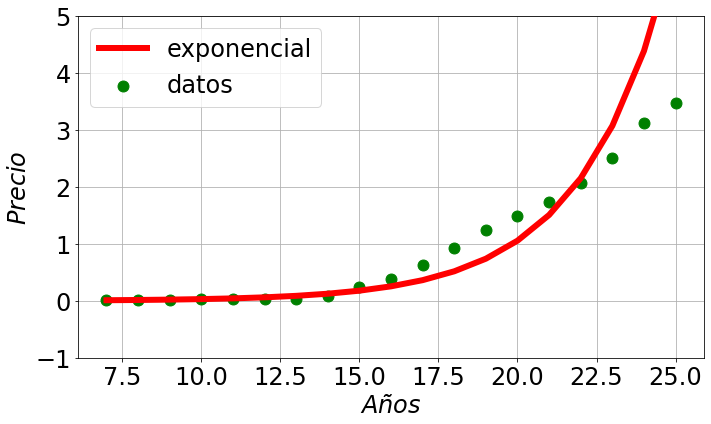

In [0]:
plt.figure(figsize = (10,6) )
plt.grid(True)

# plot data as scatter plot,
bottom, top = -01.,5.0  # return the current ylim
plt.ylim((bottom, top))   # set the ylim to bottom, top
plt.scatter(x,y,s=120,c='green',label='datos',zorder=2)
# plot best fit
plt.plot(x,y_calc,c='red',linewidth=6,label='exponencial',zorder=4)
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('$Precio$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left',fontsize=24)
plt.tight_layout()
plt.show()


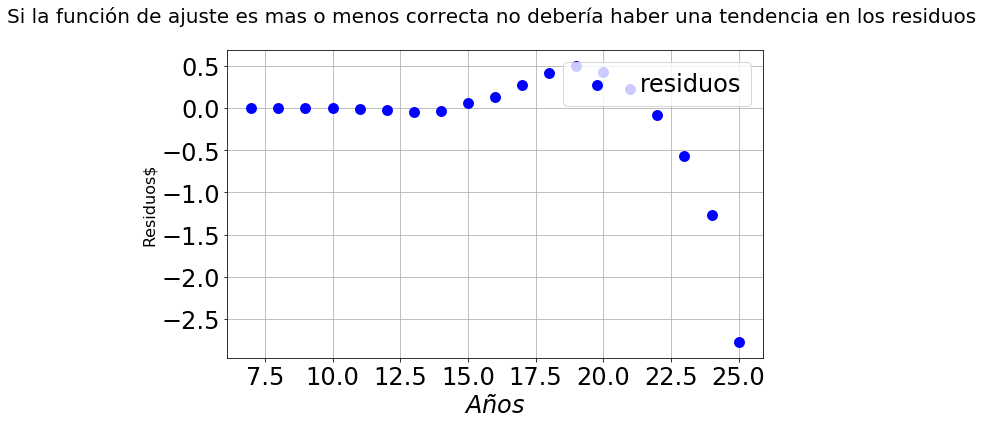

In [0]:
## plot errors to look for trend
######### Now generate plot
plt.figure(figsize = (12,6) )
plt.grid(True)
#bottom, top = -0.2,0.2  # return the current ylim
#plt.ylim((bottom, top))   # set the ylim to bottom, top
# plot data as scatter plot,
plt.title('Si la función de ajuste es mas o menos correcta no debería haber una tendencia en los residuos \n',fontsize=20)
# these are the error or residuals in y values
plt.scatter(x,(y-y_calc),s=120,c='blue',linewidth=0,label='residuos',zorder=2)
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('Residuos$',fontsize=16)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.tight_layout()
plt.show()

### 1.- Segundo Intento  $ y = c_{1}*x^{c_{2}}$

### ecuación lineal &nbsp;&nbsp;$\rightarrow v=\alpha*u+\beta$&nbsp;&nbsp; Siendo &nbsp;&nbsp;  $v=\ln(y) \,\,\, u=\ln(x),\,\,\, \alpha=c_2, \,\,\,\beta =\ln(c1)$



In [0]:
u = np.log(x)
v= np.log(y)

In [0]:
A = np.column_stack((u,np.ones(len(u))))
print('Matriz A\n',A)

Matriz A
 [[1.94591015 1.        ]
 [2.07944154 1.        ]
 [2.19722458 1.        ]
 [2.30258509 1.        ]
 [2.39789527 1.        ]
 [2.48490665 1.        ]
 [2.56494936 1.        ]
 [2.63905733 1.        ]
 [2.7080502  1.        ]
 [2.77258872 1.        ]
 [2.83321334 1.        ]
 [2.89037176 1.        ]
 [2.94443898 1.        ]
 [2.99573227 1.        ]
 [3.04452244 1.        ]
 [3.09104245 1.        ]
 [3.13549422 1.        ]
 [3.17805383 1.        ]
 [3.21887582 1.        ]]


In [0]:
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,v))
print('Vector  c \n',c)

Vector  c 
 [[  5.14715248]
 [-15.30117618]]


In [0]:
alfa = c[0]
beta = c[1]
print('Coeficientes  \u03B1 y \u03B2 \n',alfa,beta)
c1 = np.e**beta
c2 = alfa
print('Coeficientes  c1 y c2 son  \n',c1,c2)

Coeficientes  α y β 
 [5.14715248] [-15.30117618]
Coeficientes  c1 y c2 son  
 [2.26351626e-07] [5.14715248]


### 1.- Ecuación   $ y = 2.26351626e-07*años^{5.14715248}$

In [0]:
y_calc = c1*x **(c2)
suma_cuad_err= np.sum((y-y_calc)**2)
suma_cuad_err         

0.6141830727858891

In [0]:
alfa = c[0]
beta = c[1]
v= np.log(y)
v_calc= alfa*np.log(x)+beta
R2 = np.sum((v_calc-np.mean(v))**2)/np.sum((v-np.mean(v))**2)
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.9476364147277467


In [0]:
v = np.log(y)
r = v - np.dot(A,c)
R2=1 - (np.linalg.norm(r)**2 / np.sum((v - np.mean(v)) ** 2))
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.9476364147277451


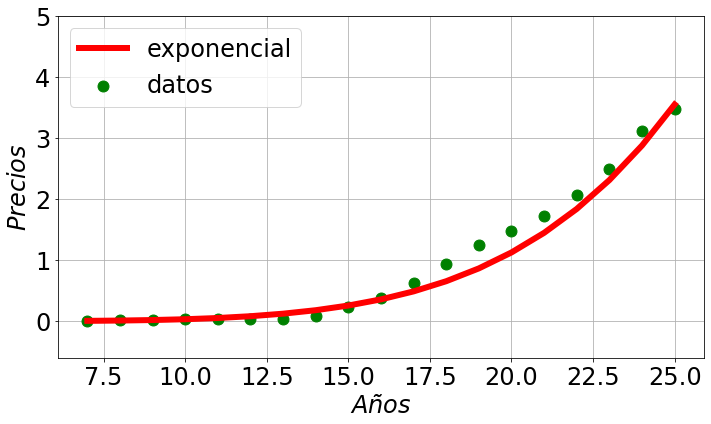

In [0]:
plt.figure(figsize = (10,6) )
plt.grid(True)

# plot data as scatter plot,
bottom, top = -0.6,5.0  # return the current ylim
plt.ylim((bottom, top))   # set the ylim to bottom, top
plt.scatter(x,y,s=120,c='green',label='datos',zorder=2)
# plot best fit
plt.plot(x,y_calc,c='red',linewidth=6,label='exponencial',zorder=4)
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('$Precios$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left',fontsize=24)
plt.tight_layout()
plt.show()


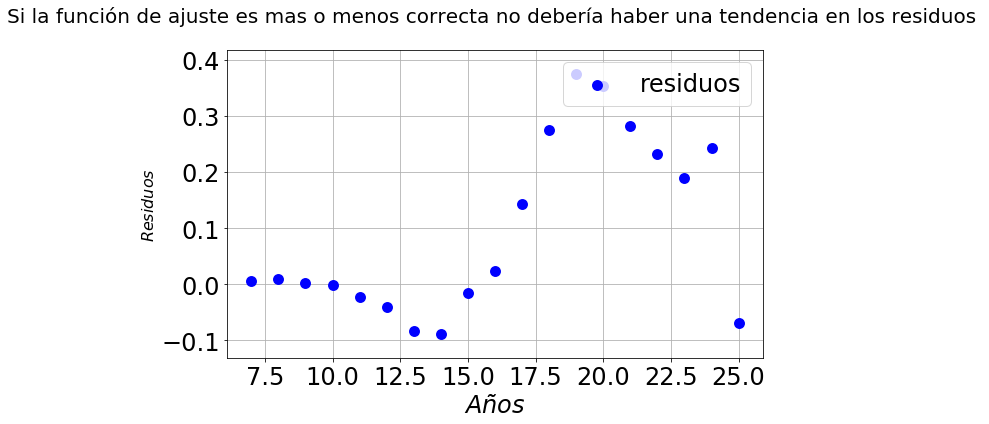

In [0]:
## plot errors to look for trend
######### Now generate plot
plt.figure(figsize = (12,6) )
plt.grid(True)
#bottom, top = -0.2,0.2  # return the current ylim
#plt.ylim((bottom, top))   # set the ylim to bottom, top
# plot data as scatter plot,
plt.title('Si la función de ajuste es mas o menos correcta no debería haber una tendencia en los residuos \n',fontsize=20)
# these are the error or residuals in y values
plt.scatter(x,(y-y_calc),s=120,c='blue',linewidth=0,label='residuos',zorder=2)
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('$Residuos$',fontsize=16)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.tight_layout()
plt.show()

### 3.- Tercer modelo $ y= c_{1}x^{2}+c_{2}x+c_{3}$

In [0]:
A = np.column_stack((x**2,x,unos))
print('Matriz A\n',A)

Matriz A
 [[ 49.   7.   1.]
 [ 64.   8.   1.]
 [ 81.   9.   1.]
 [100.  10.   1.]
 [121.  11.   1.]
 [144.  12.   1.]
 [169.  13.   1.]
 [196.  14.   1.]
 [225.  15.   1.]
 [256.  16.   1.]
 [289.  17.   1.]
 [324.  18.   1.]
 [361.  19.   1.]
 [400.  20.   1.]
 [441.  21.   1.]
 [484.  22.   1.]
 [529.  23.   1.]
 [576.  24.   1.]
 [625.  25.   1.]]


In [0]:
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,y))
print('Vector  c \n',c)

Vector  c 
 [[ 0.01659443]
 [-0.34582869]
 [ 1.73883179]]


### Ecuacion es &nbsp;&nbsp;&nbsp;&nbsp; $precio = 0.01659años^{2}-0.3458años+1.7$

In [0]:
c1 = c[0]
c2 = c[1]
c3 = c[2]

y_calc = c1*x**2+c2*x+c3
suma_errores = np.sum((y-y_calc)**2)
suma_errores

0.08914394220846247

### El coeficiente de determinación se puede calcular también como:
$$
R^{2}=1-\left( \frac{m-1}{m-n-1} \right) \frac{\parallel r \parallel_{2}^{2}}{\displaystyle\sum_{i=1}^{m}\left(y_{i}-\bar{y}\right)^{2}}
$$

In [0]:
r = y - np.dot(A,c)
m,n = A.shape[0],A.shape[1]

R2=1 - ((m-1)/(m-n-1))*np.linalg.norm(r)**2 / np.sum ((y - np.mean(y))** 2)
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.9954234018526483


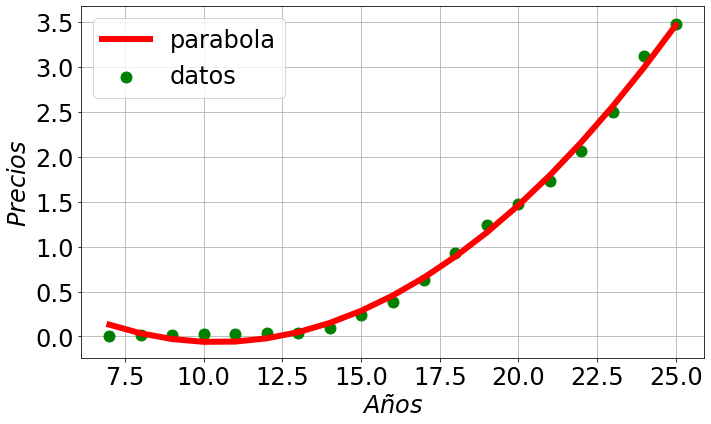

In [0]:
plt.figure(figsize = (10,6) )
plt.grid(True)

# plot data as scatter plot,
plt.scatter(x,y,s=120,c='green',label='datos',zorder=2)
# plot best fit
plt.plot(x,y_calc,c='red',linewidth=6,label='parabola',zorder=4)
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('$Precios$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left',fontsize=24)
plt.tight_layout()
plt.show()


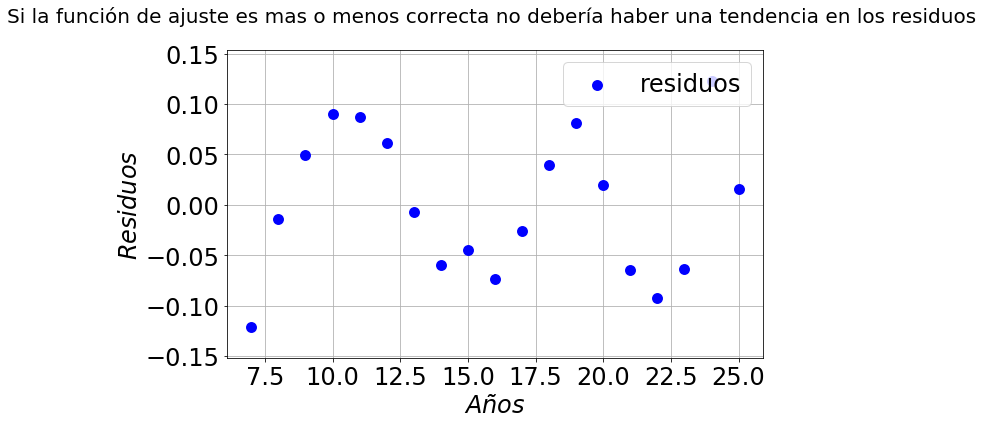

In [0]:
## plot errors to look for trend
######### Now generate plot
plt.figure(figsize = (12,6) )
plt.grid(True)
# plot data as scatter plot,
plt.title('Si la función de ajuste es mas o menos correcta no debería haber una tendencia en los residuos \n',fontsize=20)
# these are the error or residuals in y values
plt.scatter(x,r,s=120,c='blue',linewidth=0,label='residuos',zorder=2)
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('$Residuos$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.tight_layout()
plt.show()

### 4.- Cuarto modelo $ y= c_{1}x^{4}+c_{2}x^{3}+c_{3}x{2}+c_{4}x+c_{5}$

In [0]:
A = np.column_stack((x**4,x**3,x**2,x,unos))
print('Matriz A\n',A)

Matriz A
 [[2.40100e+03 3.43000e+02 4.90000e+01 7.00000e+00 1.00000e+00]
 [4.09600e+03 5.12000e+02 6.40000e+01 8.00000e+00 1.00000e+00]
 [6.56100e+03 7.29000e+02 8.10000e+01 9.00000e+00 1.00000e+00]
 [1.00000e+04 1.00000e+03 1.00000e+02 1.00000e+01 1.00000e+00]
 [1.46410e+04 1.33100e+03 1.21000e+02 1.10000e+01 1.00000e+00]
 [2.07360e+04 1.72800e+03 1.44000e+02 1.20000e+01 1.00000e+00]
 [2.85610e+04 2.19700e+03 1.69000e+02 1.30000e+01 1.00000e+00]
 [3.84160e+04 2.74400e+03 1.96000e+02 1.40000e+01 1.00000e+00]
 [5.06250e+04 3.37500e+03 2.25000e+02 1.50000e+01 1.00000e+00]
 [6.55360e+04 4.09600e+03 2.56000e+02 1.60000e+01 1.00000e+00]
 [8.35210e+04 4.91300e+03 2.89000e+02 1.70000e+01 1.00000e+00]
 [1.04976e+05 5.83200e+03 3.24000e+02 1.80000e+01 1.00000e+00]
 [1.30321e+05 6.85900e+03 3.61000e+02 1.90000e+01 1.00000e+00]
 [1.60000e+05 8.00000e+03 4.00000e+02 2.00000e+01 1.00000e+00]
 [1.94481e+05 9.26100e+03 4.41000e+02 2.10000e+01 1.00000e+00]
 [2.34256e+05 1.06480e+04 4.84000e+02 2.20000

In [0]:
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,y))
print('Vector  c \n',c)

Vector  c 
 [[-3.64766252e-05]
 [ 2.57280029e-03]
 [-4.80840339e-02]
 [ 3.32784134e-01]
 [-7.33707624e-01]]


### Ecuacion es &nbsp;&nbsp;&nbsp;&nbsp; $precio = -3.647E-05años^{4}+ 2.5728E-03años^{3}-4.8084 E-02años^{2}+ 0.3327años-0.733$

In [0]:
c1 = c[0]
c2 = c[1]
c3 = c[2]
c4 = c[3]
c5 = c[4]

y_calc = c1*x**4+c2*x**3+c3*x**2+c4*x+c5
suma_errores = np.sum((y-y_calc)**2)
suma_errores

0.06276510644199494

### El coeficiente de determinación se puede calcular también como:
$$
R^{2}=1-\left( \frac{m-1}{m-n-1} \right) \frac{\parallel r \parallel_{2}^{2}}{\displaystyle\sum_{i=1}^{m}\left(y_{i}-\bar{y}\right)^{2}}
$$

In [0]:
r = y - np.dot(A,c)
m,n = A.shape[0],A.shape[1]

R2=1 - ((m-1)/(m-n-1))*np.linalg.norm(r)**2 / np.sum ((y - np.mean(y))** 2)
print('Coeficiente de determinación es: ',R2)
print('m y n son',m,n)

Coeficiente de determinación es:  0.9962819337758981
m y n son 19 5


In [0]:
m,n = A.shape[0],A.shape[1]

R2=1 - ((m-1)/(m-n-1))*np.sum ((y_calc - np.mean(y))** 2)/ np.sum ((y - np.mean(y))** 2)
print('Coeficiente de determinación es: ',R2)
print('m y n son',m,n)

Coeficiente de determinación es:  -0.38089731834821006
m y n son 19 5


In [0]:
np.linalg.norm(r)**2 / np.sum ((y - np.mean(y))** 2)

0.002685270050740235

In [0]:
r = y - np.dot(A,c)
m,n = A.shape[0],A.shape[1]

R2=1 - ((m-1)/(m-n-1))*np.linalg.norm(r)**2 / np.sum ((y - np.mean(y))** 2)
print('Coeficiente de determinación es: ',R2)
print('m y n son',m,n)

Coeficiente de determinación es:  0.9962819337758981
m y n son 19 5


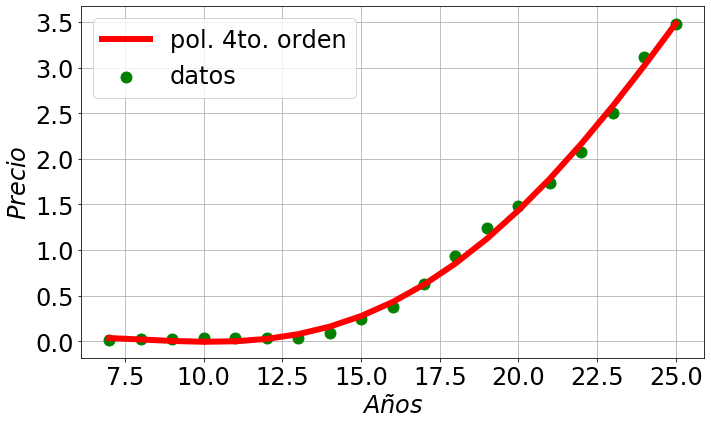

In [0]:
plt.figure(figsize = (10,6) )
plt.grid(True)

# plot data as scatter plot,
plt.scatter(x,y,s=120,c='green',label='datos',zorder=2)
# plot best fit
plt.plot(x,y_calc,c='red',linewidth=6,label='pol. 4to. orden',zorder=4)
#valores_x=np.arange(7,30)
#valores_y= c1*valores_x**4+c2*valores_x**3+c3*valores_x**2+c4*valores_x+c5
#plt.plot(valores_x,valores_y,c='red',linewidth=6,label='pol. 4to. orden',zorder=4)
#plt.yticks(np.arange(0, 5, step=0.01))
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('$Precio$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left',fontsize=24)
plt.tight_layout()
plt.show()


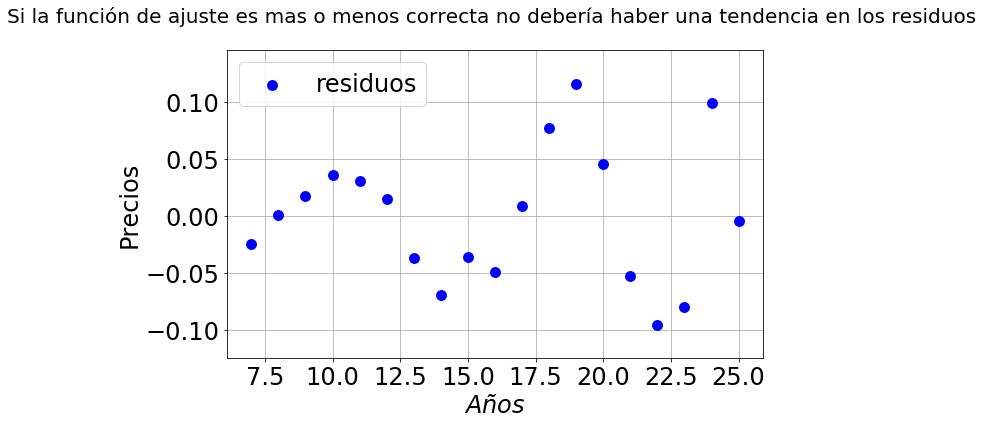

In [0]:
## plot errors to look for trend
######### Now generate plot
plt.figure(figsize = (12,6) )
plt.grid(True)
# plot data as scatter plot,
plt.title('Si la función de ajuste es mas o menos correcta no debería haber una tendencia en los residuos \n',fontsize=20)
# these are the error or residuals in y values
plt.scatter(x,r,s=120,c='blue',linewidth=0,label='residuos',zorder=2)
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('Precios',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left',fontsize=24)
plt.tight_layout()
plt.show()